In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


trainingdata = pd.read_excel("C://Users//91948//Downloads//forecasting//Airlines+Data.xlsx")

In [2]:
trainingdata

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

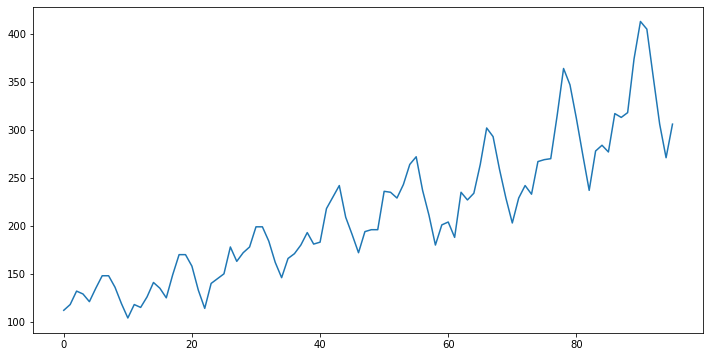

In [3]:
plt.rcParams.update({'figure.figsize': (12,6)})
trainingdata['Passengers'].plot()

# the trend is positive 

# seasonal differencing 

In [4]:
trainingdata['#Passengers_diff'] = trainingdata['Passengers'] - trainingdata['Passengers'].shift(1)

<AxesSubplot:>

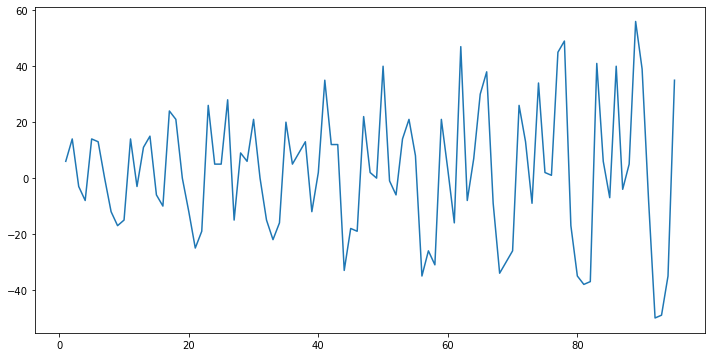

In [5]:
trainingdata['#Passengers_diff'].dropna().plot()

<AxesSubplot:>

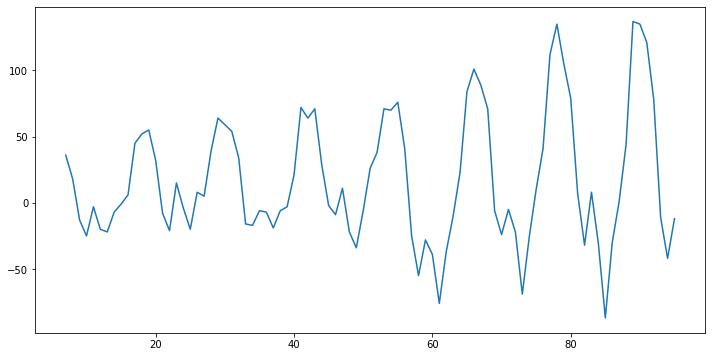

In [6]:
trainingdata['#Passengers_diff_7'] = trainingdata['Passengers'] - trainingdata['Passengers'].shift(7)
trainingdata['#Passengers_diff_7'].dropna().plot()

# Rolling statistics

In [7]:
trainingdata['#MA20'] = trainingdata['Passengers'].rolling(window = 30).mean()

<AxesSubplot:>

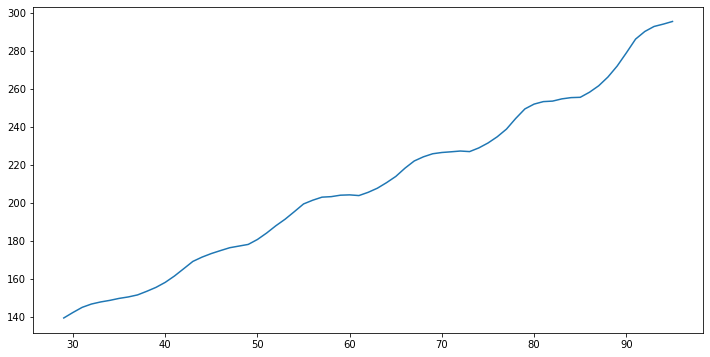

In [8]:
trainingdata['#MA20'].dropna().plot()

# Time series Decompose

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [10]:
trainingdata.reset_index(inplace=True)

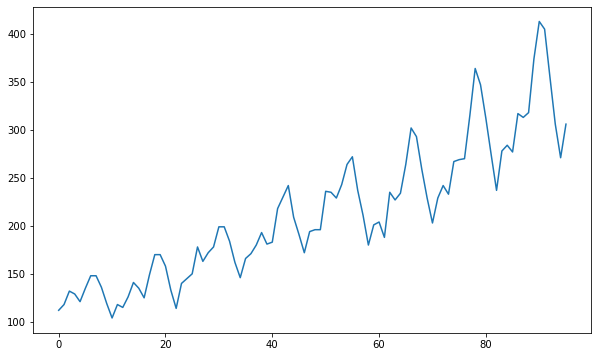

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(trainingdata['Passengers'])

In [12]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(trainingdata['Passengers'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(trainingdata['Passengers'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

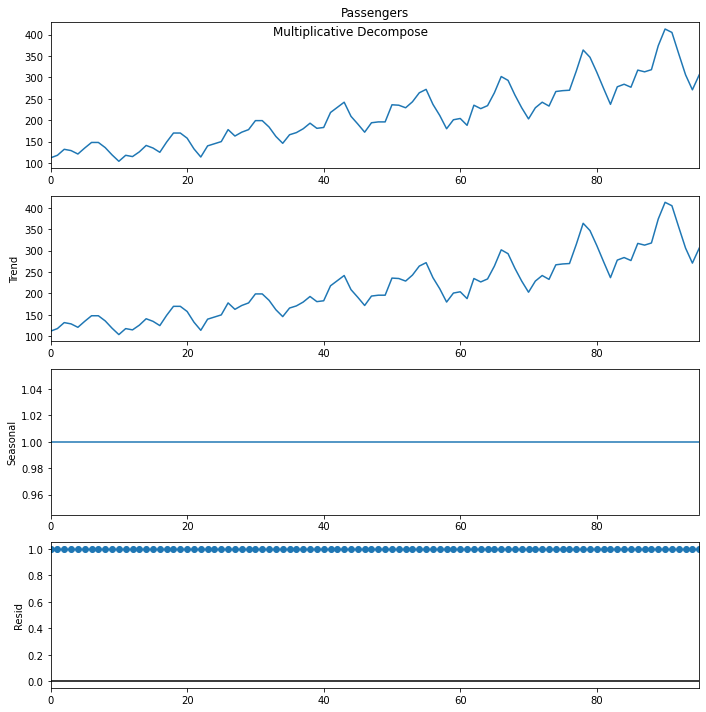

In [13]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

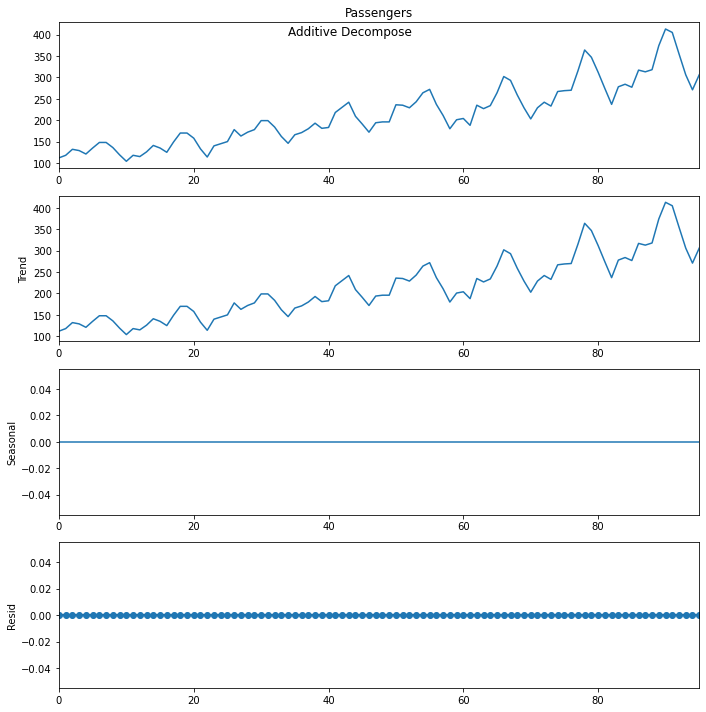

In [14]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

#  ARMA

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
traindata = pd.read_excel("C://Users//91948//Downloads//forecasting//Airlines+Data.xlsx", parse_dates=['Passengers'], index_col='Passengers')

In [17]:
from statsmodels.tsa.arima_model import ARMA

In [18]:
ARMAmodel = ARMA(trainingdata['Passengers'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

In [19]:
ypredicted = ARmodel_fit.predict(len(trainingdata), len(trainingdata)+2)
print(ypredicted)

96    318.706152
97    309.844891
98    301.738004
dtype: float64


 succesive predicted value of the passengers

# Autoregressive Integrated Moving Average (ARIMA)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
ARIMAmodel = ARIMA(trainingdata['Passengers'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

ypredicted = ARIMA_model_fit.predict(len(trainingdata), len(trainingdata)+2)
print(ypredicted)

96    6.587640
97    5.405277
98    4.548315
dtype: float64


# COCA COLA DATA SETS 

In [22]:
data_df = pd.read_excel("C://Users//91948//Downloads//forecasting//CocaCola_Sales_Rawdata.xlsx")
data_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [23]:
data_df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [24]:
pd.get_dummies(data_df,drop_first=True).shape

(42, 42)

In [25]:
data_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [26]:
import numpy as np
final_list = []
quarter = list(data_df["Quarter"])
for qtr in quarter :
    if qtr[0:2] == "Q1":
        qtr = "03"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q2":
        qtr = "06"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q3":
        qtr = "09"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q4":
        qtr = "12"+qtr[2:]
        final_list.append(qtr)
data_df["Quarters"] = final_list
# data = data.drop("Quarter", axis=1)
data_df.head()


,Quarter,Sales,Quarters
0,Q1_86,1734.827000,03_86
1,Q2_86,2244.960999,06_86
2,Q3_86,2533.804993,09_86
3,Q4_86,2154.962997,12_86
4,Q1_87,1547.818996,03_87


In [27]:
data = data_df.drop("Quarter", axis=1)
data.head()

,Sales,Quarters
0,1734.827000,03_86
1,2244.960999,06_86
2,2533.804993,09_86
3,2154.962997,12_86
4,1547.818996,03_87


In [28]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     42 non-null     float64
 1   Quarters  42 non-null     object 
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


Sales       0
Quarters    0
dtype: int64

In [29]:
data["Quarters"] = pd.to_datetime(data["Quarters"], format="%m_%y")
data.head()

,Sales,Quarters
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01


In [30]:
data

,Sales,Quarters
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01
5,2104.411995,1987-06-01
6,2014.362999,1987-09-01
7,1991.746998,1987-12-01
8,1869.049999,1988-03-01
9,2313.631996,1988-06-01


<AxesSubplot:>

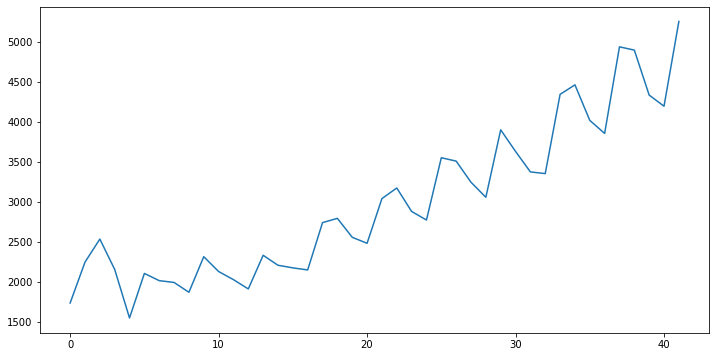

In [31]:
plt.rcParams.update({'figure.figsize': (12,6)})
data['Sales'].plot()

In [32]:
# there is positive trend with the data set but doesnt have high sensitivty

# seasonal difference

In [34]:
data['Sales'] = data['Sales'] - data['Sales'].shift(1)

<AxesSubplot:>

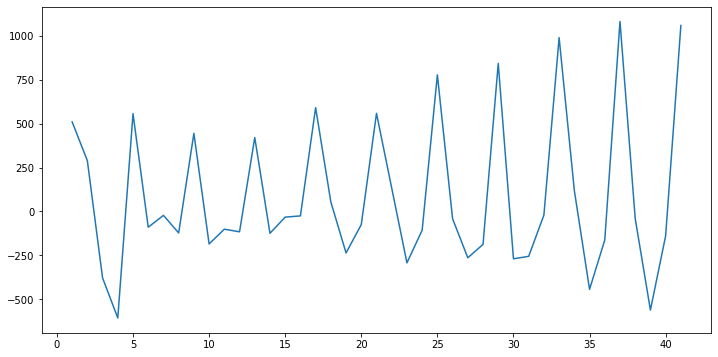

In [35]:
data['Sales'].dropna().plot()

<AxesSubplot:>

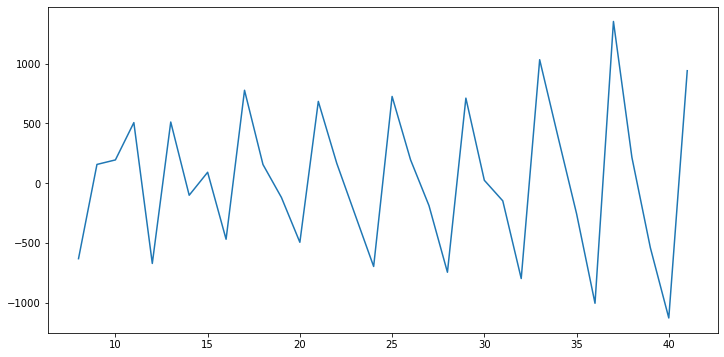

In [36]:
data['Sales_7'] = data['Sales'] - data['Sales'].shift(7)

data['Sales_7'].dropna().plot()

# Rolling statistics

In [37]:
data['#MA20'] = data['Sales'].rolling(window = 30).mean()

<AxesSubplot:>

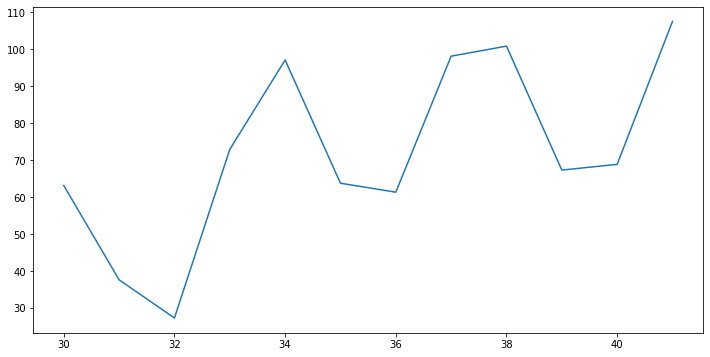

In [38]:
data['#MA20'].dropna().plot()

In [49]:
import numpy as np
quarter=['Q1','Q2','Q3','Q4']
n=data_df['Quarter'][0]
n[0:2]


data_df['quarter']=0


for i in range(42):
    n=data_df['Quarter'][i]
    data_df['quarter'][i]=n[0:2]

In [50]:
dummy=pd.DataFrame(pd.get_dummies(data_df['quarter']))

<AxesSubplot:>

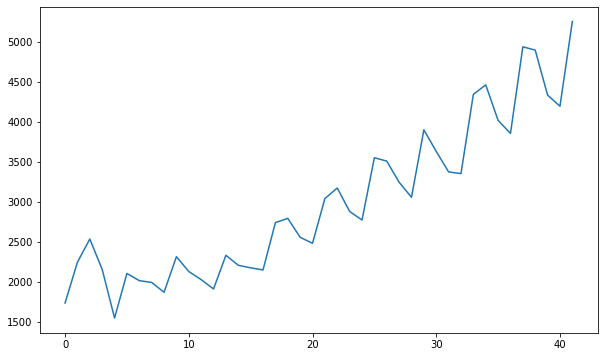

In [53]:
coco=pd.concat((data_df,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [54]:
import statsmodels.formula.api as smf

#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022813

In [55]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315095

In [56]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672346

In [57]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719352977

In [58]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187971785

In [59]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0     581.845719
 1    1860.023815
 2     464.982902
 3     301.738007
 4     466.247973
 5     421.178788
 6    1963.389640
 7     225.524390
 8     475.561835
 dtype: float64}

In [60]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmsequad,475.561835


In [66]:
# since the data given is full of missing values , even after data cleaning and all other eda part its not enough to create auto regressor and moving average with this data set

#hence solved ordinary least sqaure method of different seasonality to determine the rmsce vale of each 


# please show me the arma, arima model if you have got ,wanted to see the solution of it 